#Time Series Decomposition

***Time series decomposition is a technique that splits a time series into several components, each representing an underlying pattern category, trend, seasonality, and noise.***

**Seasonality:** describes the periodic signal in your time series.

**Trend:** describes whether the time series is decreasing, constant, or increasing over time.

**Noise:** describes what remains behind the separation of seasonality and trend from the time series. In other words, it’s the variability in the data that cannot be explained by the model.

(Bonaros, 2021)

In [1]:
from re import X
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_csv('./mathData.csv')

In [3]:
dataSetProcess = dataset[['Lowest_Possible', 'Dates']]
dataSetProcess = dataSetProcess.reset_index(drop=True)
dataSetProcess = dataSetProcess.set_index(['Dates'])

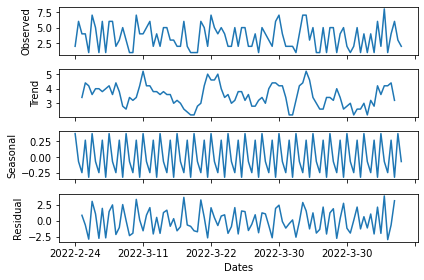

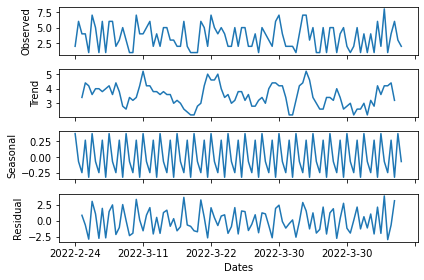

In [4]:
result = seasonal_decompose(dataSetProcess, freq = 5, model = "additive")
result.plot()

#Autocorrelation and Partial Autocorrelation

Autocorrelation and partial autocorrelation plots are heavily used in time series analysis and forecasting.

These are plots that graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps.

(Brownlee, 2017)


Autocorrelation analysis is an important step in the Exploratory Data Analysis (EDA) of time series. The autocorrelation analysis helps in detecting hidden patterns and seasonality and in checking for randomness. It is especially important when you intend to use an ARIMA model for forecasting because the autocorrelation analysis helps to identify the AR and MA parameters for the ARIMA model.


## ACF

ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. We plot these values along with the confidence band - thus making an ACF plot. In simple terms, it describes how well the present value of the series is related with its past values. A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot’.

(Salvi, 2019)

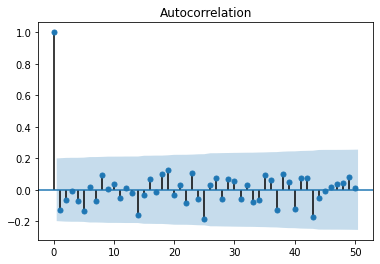

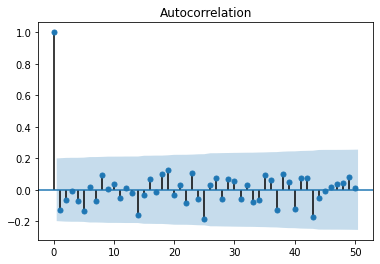

In [5]:
plot_acf(dataSetProcess, lags= 50)

## PACF

PACF is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation. So if there is any hidden information in the residual which can be modeled by the next lag, we might get a good correlation and we will keep that next lag as a feature while modeling.

(Salvi, 2019)

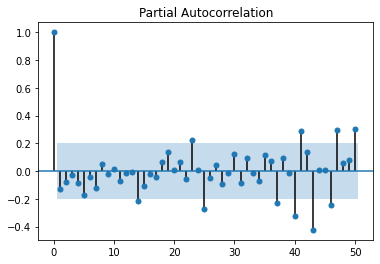

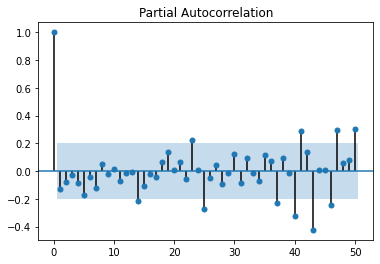

In [6]:
plot_pacf(dataSetProcess, lags = 50)

#Augmented Dickey–Fuller test

Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series.

(Prabhakaran, 2019)

In [10]:
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(dataSetProcess.Lowest_Possible, autolag = "AIC")
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -11.037497897287949
ADF p-values: 5.470347034471012e-20
ADF number of lags used: 0
ADF number of observations: 96
ADF critical values: {'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}
ADF best information criterion: 350.3036114294481


**Conclusions from this:**

The p value is way less than the significance level of 0.05, so we can reject the null hypothesis and infer that the series is stationary


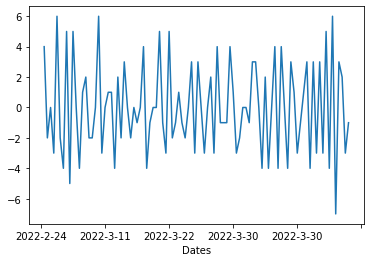

In [ ]:
#Note: This was just a test 
prev_lowest_possible_value = dataSetProcess.Lowest_Possible.shift()
differenced_lowest_possible_value = dataSetProcess.Lowest_Possible - prev_lowest_possible_value
differenced_lowest_possible_value.plot()

#ADF Test on Good Data

The data in the beginning is rather bad as a result of it not being consistent for the most part in measuring and obtaining the data, so here I will just use the good data that was obtained on 3/30/22


ADF test statistic: -7.6000512510868266
ADF p-values: 2.4026501679257005e-11
ADF number of lags used: 0
ADF number of observations: 47
ADF critical values: {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}
ADF best information criterion: 163.41242116255307


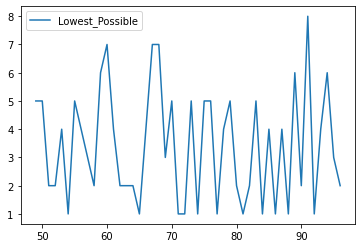

In [37]:
optimalDataSet = dataset[['Lowest_Possible', 'Dates']].tail(48)
optimalDataSet = optimalDataSet.fillna(1)
optimalDataSet.plot()
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(optimalDataSet.Lowest_Possible)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

**Conclusions from this:**

Way better than when using the other data, but the result is the same in which we have to reject the null hypothesis and judge that the series is stationary

#Final Conclusions

Based upon the existing data, all null hypotheses can be rejected and we can assume that the series is stationary. This means that the data has statistical properities that do not variy in time. For example, mean, variance, and autocorrelation are all constant over time. This is very good for machine learning, since a stationary series is way easier to predict.  

##Context on Stationarity

**Note: Very relevant to precalculus as of right now!**

In the most intuitive sense, stationarity means that the statistical properties of a process generating a time series do not change over time. It does not mean that the series does not change over time, just that the way it changes does not itself change over time. The algebraic equivalent is thus a linear function, perhaps, and not a constant one; the value of a linear function changes as 𝒙 grows, but the way it changes remains constant — it has a constant slope; one value that captures that rate of change.

(Palachy, 2019)